In [1]:
import Pkg; Pkg.activate("./")

  Activating project at `~/Documents/Research/MonitoringMetrology/BackAction.jl/notebooks`


# Monte Carlo Wavefunction Method

In [2]:
using Random, Statistics, Plots, LaTeXStrings, DifferentialEquations, LinearAlgebra, BackAction, Base.Threads

# Example 1: Radiative Damping

Here we consider the (base) jumps and hamiltonian:
$$ H = \frac{\Delta\omega}{2}\sigma_z $$
$$ L = \sqrt{\gamma}\sigma_- $$

with a $T$ parametrization and coherent fields

In [3]:
Tid = 1/sqrt(2) * [1 1im; 1 1im]
function rotation_matrix(theta)
    R = [cos(theta) -sin(theta); sin(theta) cos(theta)]
    return R
end
ntimes = 200
params = BackAction.rd_params;
t_eval = collect(LinRange(0.0, params.tf, ntimes));

In [4]:
function get_z_sample(theta)
    T = rotation_matrix(theta)*Tid#reshape([1.0 + 0.0im], 1,1)
    alphas = [3.3 + 0.0im; 3.3 + 0.0im]
    sys = System(BackAction.rd_H, [BackAction.rd_L], T, alphas)
    sim = get_sol_jumps(sys, params, t_eval)
    z_sample = Array{Float64}(undef, ntimes, params.ntraj)
    @threads for n in 1:params.ntraj
                 for t in 1:ntimes
                     psi = sim[n](t_eval[t])
                     z_sample[t, n] = real(dot(psi, BackAction.sigma_z, psi))/dot(psi, psi)
                 end
    end 
    return z_sample
end 

get_z_sample (generic function with 1 method)

In [22]:
sol.prob.kwargs[:callback]

LoadError: UndefVarError: `sol` not defined

In [ ]:
z_sample1 = get_z_sample(1.5);
z_sample2 = get_z_sample(1.8);
z_sample3 = get_z_sample(0.8);

In [ ]:
plot(t_eval, z_sample1[:, 1], label="Sample trajectory T1", xlabel=L"t", ylabel=L"\langle\sigma_z\rangle", title="Radiative Damping")
plot!(t_eval, z_sample2[:, 2], label="Sample trajectory T2")
plot!(t_eval, z_sample3[:, 3], label="Sample trajectory T3")
scatter!(t_eval, dropdims(mean(z_sample1, dims=2), dims=2), label="Average T1")
scatter!(t_eval, dropdims(mean(z_sample2, dims=2), dims=2), label="Average T2", markersize=2, markershape=:star)
scatter!(t_eval, dropdims(mean(z_sample3, dims=2), dims=2), label="Average T3", markersize=2, markershape=:diamond)
plot!(t_eval, t -> 2*exp(-BackAction.rd_gamma*t) - 1, label="Analytical", linewidth=3, line=:dash)

In [ ]:
plot(t_eval, z_sample1[:, 1], label="Sample trajectory T1", xlabel=L"t", ylabel=L"\langle\sigma_z\rangle", title="Radiative Damping")
plot!(t_eval, z_sample2[:, 2], label="Sample trajectory T2")
plot!(t_eval, z_sample3[:, 3], label="Sample trajectory T3")
scatter!(t_eval, dropdims(var(z_sample1, dims=2), dims=2), label="Average T1")
scatter!(t_eval, dropdims(var(z_sample2, dims=2), dims=2), label="Average T2", markersize=2, markershape=:star)
scatter!(t_eval, dropdims(var(z_sample3, dims=2), dims=2), label="Average T3", markersize=2, markershape=:diamond)
plot!(t_eval, t -> 2*exp(-BackAction.rd_gamma*t) - 1, label="Analytical", linewidth=3, line=:dash)

# Example 2: Driven Qubit


In [61]:
# Time evaluation stuff
ntimes = 75
params = SimulParameters([1.0+0im; 0.0],
    25.0, #tf
    1, # seed
    5_000, # Number of trajectories
    25_000, # Number of samples in the finegrid
    4.0, # Multiplier to use in the fine grid
    1e-3 # Tolerance for passing Dark state test
)
t_eval = collect(LinRange(0.0, params.tf, ntimes));
# Parameters
gamma = 1.0
delta = 0.5
omega = 0.5
nbar = 0.0

0.0

In [62]:
function su2_matrix(theta, phi, psi)
    return [exp(1im*phi)*cos(theta) exp(1im*psi)*sin(theta); -exp(-1im*psi)*sin(theta) exp(-1im*phi)*cos(theta)]
end 

su2_matrix (generic function with 1 method)

In [63]:
H = 0.5*delta*BackAction.sigma_z + 0.5*omega*BackAction.sigma_x
L1 = sqrt(gamma*(nbar+1))*BackAction.sigma_m
L2 = sqrt(gamma*(nbar))*BackAction.sigma_p
T1 = su2_matrix(0.0, 0.0, 0.0)
T2 = su2_matrix(0.3, 0.0, 0.0)
T3 = su2_matrix(0.5, 0.0, 0.0)
alphas = [1.0 + 0.0im; 1.0 + 0.0im]

 

2-element Vector{ComplexF64}:
 1.0 + 0.0im
 1.0 + 0.0im

In [64]:
function get_r_sample(T)
    sys = System(H, [L1, L2], T, alphas)
    # Problem definition
    @time begin
    sim = get_sol_jumps(sys, params, t_eval);
    end
    # observable evaluation 
    r_sample = Array{Float64}(undef, 3, ntimes,params.ntraj)
    sigma = [BackAction.sigma_x, BackAction.sigma_y, BackAction.sigma_z]
    @threads for n in 1:params.ntraj
                 for t in 1:ntimes
                    psi = sim[n](t_eval[t])
                    for k in 1:3
                        r_sample[k, t, n] = real(dot(psi, sigma[k], psi))/dot(psi, psi)
                     end
                 end 
            end 
    return r_sample
end

get_r_sample (generic function with 1 method)

In [70]:
sys = System(H, [L1, L2], T1, alphas)

System(NLEVELS=2
NCHANNELS=2
H=ComplexF64[-0.25 + 0.0im 0.25 - 0.5im; 0.25 + 0.5im 0.25 + 0.0im]
Ls=Matrix{ComplexF64}[[1.0 + 0.0im 1.0 + 0.0im; 0.0 + 0.0im 1.0 + 0.0im], [1.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 1.0 + 0.0im]]
J=ComplexF64[2.0 + 0.0im 1.0 + 0.0im; 1.0 + 0.0im 3.0 + 0.0im])
Heff=ComplexF64[-0.25 - 1.0im 0.25 - 1.0im; 0.25 + 0.0im 0.25 - 1.5im])

In [71]:
sim = get_sol_jumps(sys, params, t_eval);

In [73]:
sim[1].u

145-element Vector{Vector{ComplexF64}}:
 [1.0 + 0.0im, 0.0 + 0.0im]
 [0.7080575674436262 + 0.06970640091956624im, 0.0003946829874722997 - 0.05529985595515177im]
 [0.4932540035631239 + 0.11090035710287409im, 0.002065259693885921 - 0.07222736431016907im]
 [0.4663894472195092 + 0.11491584296679982im, 0.0024083745941770075 - 0.07282017544177931im]
 [0.9842700234879592 + 0.08838245771555682im, 0.005056531425865944 - 0.1528904624923002im]
 [0.7205815865369897 + 0.15646025665691865im, 0.0019031177584344307 - 0.14837332956460245im]
 [0.5087429647148538 + 0.19175626671742785im, 0.0035721023028084838 - 0.13078355572831613im]
 [0.9625264956611477 + 0.11455421403268307im, 0.006711188745004899 - 0.2457133230886233im]
 [0.9298399347839467 + 0.12578714481813116im, 0.005458322499352179 - 0.241717527731497im]
 [0.6382249691764859 + 0.206222911166083im, 0.0005046133383050317 - 0.1968592773397778im]
 [0.9555473072949431 + 0.01400811131057107im, 0.0007549077572766398 - 0.29450389887601164im]
 [0.950563461

In [65]:
# Parameters definition and problem initialization
r_sample1 = get_r_sample(T1);
r_sample2 = get_r_sample(T2);
r_sample3 = get_r_sample(T3);

  9.081613 seconds (185.56 M allocations: 15.900 GiB, 46.70% gc time)
  7.700441 seconds (192.28 M allocations: 16.474 GiB, 39.27% gc time)
  8.431226 seconds (198.89 M allocations: 17.037 GiB, 42.70% gc time)


In [66]:
# Analytical solution
function resonance_fluorescene!(du, u, p, t)
    #     -0.5*gamma*(2*nbar+1)*r[1] - delta*r[2]
    # delta*r[1] - 0.5*gamma*(2*nbar+1)*r[2] - omega*r[3];
    # omega*r[2] - gamma*(2*nbar+1)*r[3] - gamma]

    du[1] = - 0.5*gamma*(2*nbar+1)*u[1] - delta*u[2]  
    du[2] = + delta*u[1] - 0.5*gamma*(2*nbar+1)*u[2]- omega*u[3]  
    du[3] = omega*u[2] - gamma*(2*nbar+1)*u[3] - gamma
end
u0 = [0.0, 0.0, -1.0]
prob_analytical = ODEProblem(resonance_fluorescene!, u0, extrema(t_eval))
sol_analytical = solve(prob_analytical);

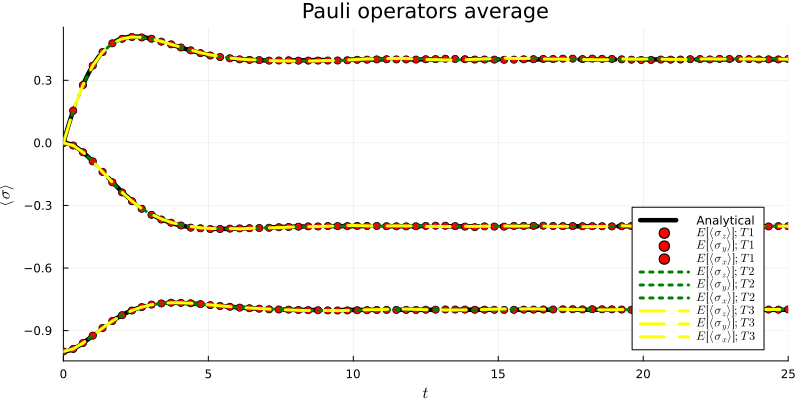

In [67]:
# Analytical
plot(sol_analytical, idxs=(0,3), label="Analytical", color="black", line=:dash, linewidth=4.5)
plot!(sol_analytical, idxs=(0,2), label=false, color="black",line=:dash, linewidth=4.5)
plot!(sol_analytical, idxs=(0,1), label=false, color="black",line=:dash, linewidth=4.5)
# T1
scatter!(t_eval, dropdims(mean(r_sample1[3, :, :], dims=2), dims=2), label=L"E[\langle\sigma_z\rangle]; T1", linewidth=3.0, color="red",
    title="Pauli operators average", size=(800, 400))
scatter!(t_eval, dropdims(mean(r_sample1[2, :, :], dims=2), dims=2), label=L"E[\langle\sigma_y\rangle]; T1", linewidth=3, color="red",
        )
scatter!(t_eval, dropdims(mean(r_sample1[1, :, :], dims=2), dims=2), label=L"E[\langle\sigma_x\rangle]; T1", linewidth=3, color="red",
        )
# T2
plot!(t_eval, dropdims(mean(r_sample2[3, :, :], dims=2), dims=2), label=L"E[\langle\sigma_z\rangle]; T2", linewidth=3, color="green",
    line=:dot)
plot!(t_eval, dropdims(mean(r_sample2[2, :, :], dims=2), dims=2), label=L"E[\langle\sigma_y\rangle]; T2", linewidth=3, color="green",
    line=:dot)
plot!(t_eval, dropdims(mean(r_sample2[1, :, :], dims=2), dims=2), label=L"E[\langle\sigma_x\rangle]; T2", linewidth=3, color="green",
    line=:dot)
#T3
plot!(t_eval, dropdims(mean(r_sample3[3, :, :], dims=2), dims=2), label=L"E[\langle\sigma_z\rangle]; T3", linewidth=3, color="yellow",
     line=:dash)
plot!(t_eval, dropdims(mean(r_sample3[2, :, :], dims=2), dims=2), label=L"E[\langle\sigma_y\rangle]; T3", linewidth=3, color="yellow",
    line=:dash)
plot!(t_eval, dropdims(mean(r_sample3[1, :, :], dims=2), dims=2), label=L"E[\langle\sigma_x\rangle]; T3", linewidth=3, color="yellow",
    line=:dash, xlabel=L"t", ylabel=L"\langle\sigma\rangle")

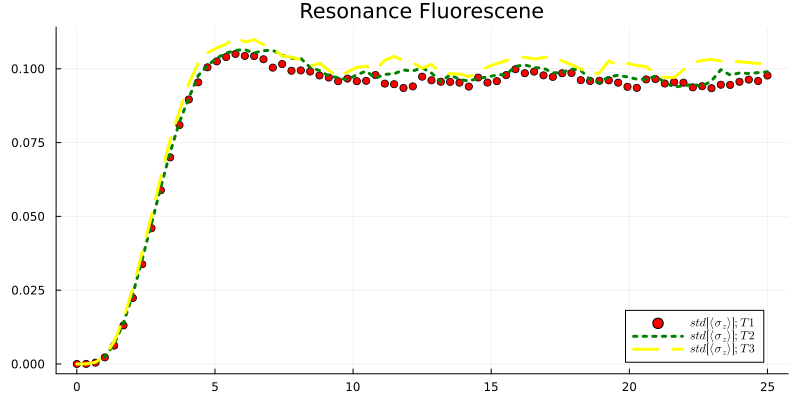

In [68]:
# T1
scatter(t_eval, dropdims(std(r_sample1[3, :, :], dims=2), dims=2), label=L"std[\langle\sigma_z\rangle]; T1", linewidth=3.0, color="red",
    title="Resonance Fluorescene", size=(800, 400))
#scatter!(t_eval, dropdims(std(r_sample1[2, :, :], dims=2), dims=2), label=L"std[\langle\sigma_y\rangle]; T1", linewidth=3, color="red",
#        )
#scatter(t_eval, dropdims(var(r_sample1[1, :, :], dims=2), dims=2), label=L"Var[\langle\sigma_x\rangle]; T1", linewidth=3, color="red",
#        title="Variance ")
# T2
plot!(t_eval, dropdims(std(r_sample2[3, :, :], dims=2), dims=2), label=L"std[\langle\sigma_z\rangle]; T2", linewidth=3, color="green",
    title="Resonance Fluorescene", size=(800, 400), line=:dot)
#plot!(t_eval, dropdims(std(r_sample2[2, :, :], dims=2), dims=2), label=L"std[\langle\sigma_y\rangle]; T2", linewidth=3, color="green",
#    line=:dot)
#plot!(t_eval, dropdims(var(r_sample2[1, :, :], dims=2), dims=2), label=L"Var[\langle\sigma_x\rangle]; T2", linewidth=3, color="green",
#    line=:dot)
#T3
plot!(t_eval, dropdims(std(r_sample3[3, :, :], dims=2), dims=2), label=L"std[\langle\sigma_z\rangle]; T3", linewidth=3, color="yellow",
    title="Resonance Fluorescene", size=(800, 400), line=:dash)
#plot!(t_eval, dropdims(std(r_sample3[2, :, :], dims=2), dims=2), label=L"std[\langle\sigma_y\rangle]; T3", linewidth=3, color="yellow",
#    line=:dash)
#plot!(t_eval, dropdims(var(r_sample3[1, :, :], dims=2), dims=2), label=L"Var[\langle\sigma_x\rangle]; T3", linewidth=3, color="yellow",
#    line=:dash, xlabel=L"t", ylabel=L"Var\langle\sigma\rangle")